The first step of our process is to download all the necessary libraries 

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.ticker as mticker
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from scipy.stats import chi2_contingency

In [2]:
#loading the dataset
df = pd.read_csv("allschools.csv")
df.head()

,Outstanding_Loan,Branch,Student_Count,Teacher_Count,Net_Disbursed,Tenure,Product_Name,Sub_Product,Interest_Rate,Vintage,ST_Ratio,Annual_Fee,AnnualFee_Income,Holiday_Loan,End_Use,Loan_Classification,Default,Risk
0,69530,nairobi branch,236,12,430000,9,bridge,school upgrade loan,28,14,20,4050,955800,False,Open,Standard,1,Defaulters
1,134305,nairobi branch,271,12,500000,36,bridge,school construction,26,13,23,0,0,False,Done,Standard,1,Defaulters
2,140746,nairobi branch,370,17,1000000,36,flexi,school construction,24,11,22,6000,2220000,False,Done,Standard,1,Defaulters
3,291096,nairobi branch,304,15,1000000,13,flexi,school construction,26,17,20,0,0,False,Open,Standard,1,Defaulters
4,108596,nairobi branch,416,13,350000,12,bridge,school construction,28,30,32,0,0,False,Done,Standard,1,Defaulters


In [3]:
df.columns

Index(['Outstanding_Loan', 'Branch', 'Student_Count', 'Teacher_Count',
       'Net_Disbursed', 'Tenure', 'Product_Name', 'Sub_Product',
       'Interest_Rate', 'Vintage', 'ST_Ratio', 'Annual_Fee',
       'AnnualFee_Income', 'Holiday_Loan', 'End_Use', 'Loan_Classification',
       'Default', 'Risk'],
      dtype='object')

Series([], dtype: float64)


c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

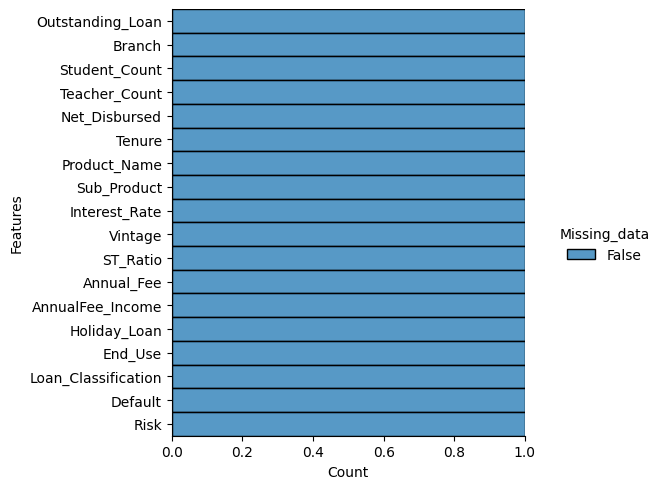

In [4]:
#Visual of null records to confirm no more nulls
def na_ratio_plot(df=df):

    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features'),y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

print(df.isna().mean()[df.isna().mean()>0])
na_ratio_plot()

In [5]:
features_df=df[['Outstanding_Loan','Student_Count','Net_Disbursed','Teacher_Count','Tenure','Interest_Rate','Vintage','Annual_Fee','ST_Ratio','Default']]
features_df

,Outstanding_Loan,Student_Count,Net_Disbursed,Teacher_Count,Tenure,Interest_Rate,Vintage,Annual_Fee,ST_Ratio,Default
0,69530,236,430000,12,9,28,14,4050,20,1
1,134305,271,500000,12,36,26,13,0,23,1
2,140746,370,1000000,17,36,24,11,6000,22,1
3,291096,304,1000000,15,13,26,17,0,20,1
4,108596,416,350000,13,12,28,30,0,32,1
...,...,...,...,...,...,...,...,...,...,...
433,500000,320,500000,14,36,39,7,12000,23,0
434,650000,145,650000,12,36,39,8,28950,12,0
435,1388000,214,354389,10,36,39,17,20250,21,0
436,10000000,335,3174167,25,60,26,7,240000,13,0


In [6]:
#Checking  the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Outstanding_Loan     438 non-null    int64 
 1   Branch               438 non-null    object
 2   Student_Count        438 non-null    int64 
 3   Teacher_Count        438 non-null    int64 
 4   Net_Disbursed        438 non-null    int64 
 5   Tenure               438 non-null    int64 
 6   Product_Name         438 non-null    object
 7   Sub_Product          438 non-null    object
 8   Interest_Rate        438 non-null    int64 
 9   Vintage              438 non-null    int64 
 10  ST_Ratio             438 non-null    int64 
 11  Annual_Fee           438 non-null    int64 
 12  AnnualFee_Income     438 non-null    int64 
 13  Holiday_Loan         438 non-null    bool  
 14  End_Use              438 non-null    object
 15  Loan_Classification  438 non-null    object
 16  Default 

In [7]:
#Recognising categorical variables as categorical.
#Converting categorical columns to categorical 

df['Branch'] = pd.Categorical(df['Branch'])
df['Product_Name'] = pd.Categorical(df['Product_Name'])
df['Sub_Product'] = pd.Categorical(df['Sub_Product'])
df['End_Use'] = pd.Categorical(df['End_Use'])
df['Loan_Classification'] = pd.Categorical(df['Loan_Classification'])
df['Holiday_Loan'] = pd.Categorical(df['Holiday_Loan'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Outstanding_Loan     438 non-null    int64   
 1   Branch               438 non-null    category
 2   Student_Count        438 non-null    int64   
 3   Teacher_Count        438 non-null    int64   
 4   Net_Disbursed        438 non-null    int64   
 5   Tenure               438 non-null    int64   
 6   Product_Name         438 non-null    category
 7   Sub_Product          438 non-null    category
 8   Interest_Rate        438 non-null    int64   
 9   Vintage              438 non-null    int64   
 10  ST_Ratio             438 non-null    int64   
 11  Annual_Fee           438 non-null    int64   
 12  AnnualFee_Income     438 non-null    int64   
 13  Holiday_Loan         438 non-null    category
 14  End_Use              438 non-null    category
 15  Loan_Classification  43

c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

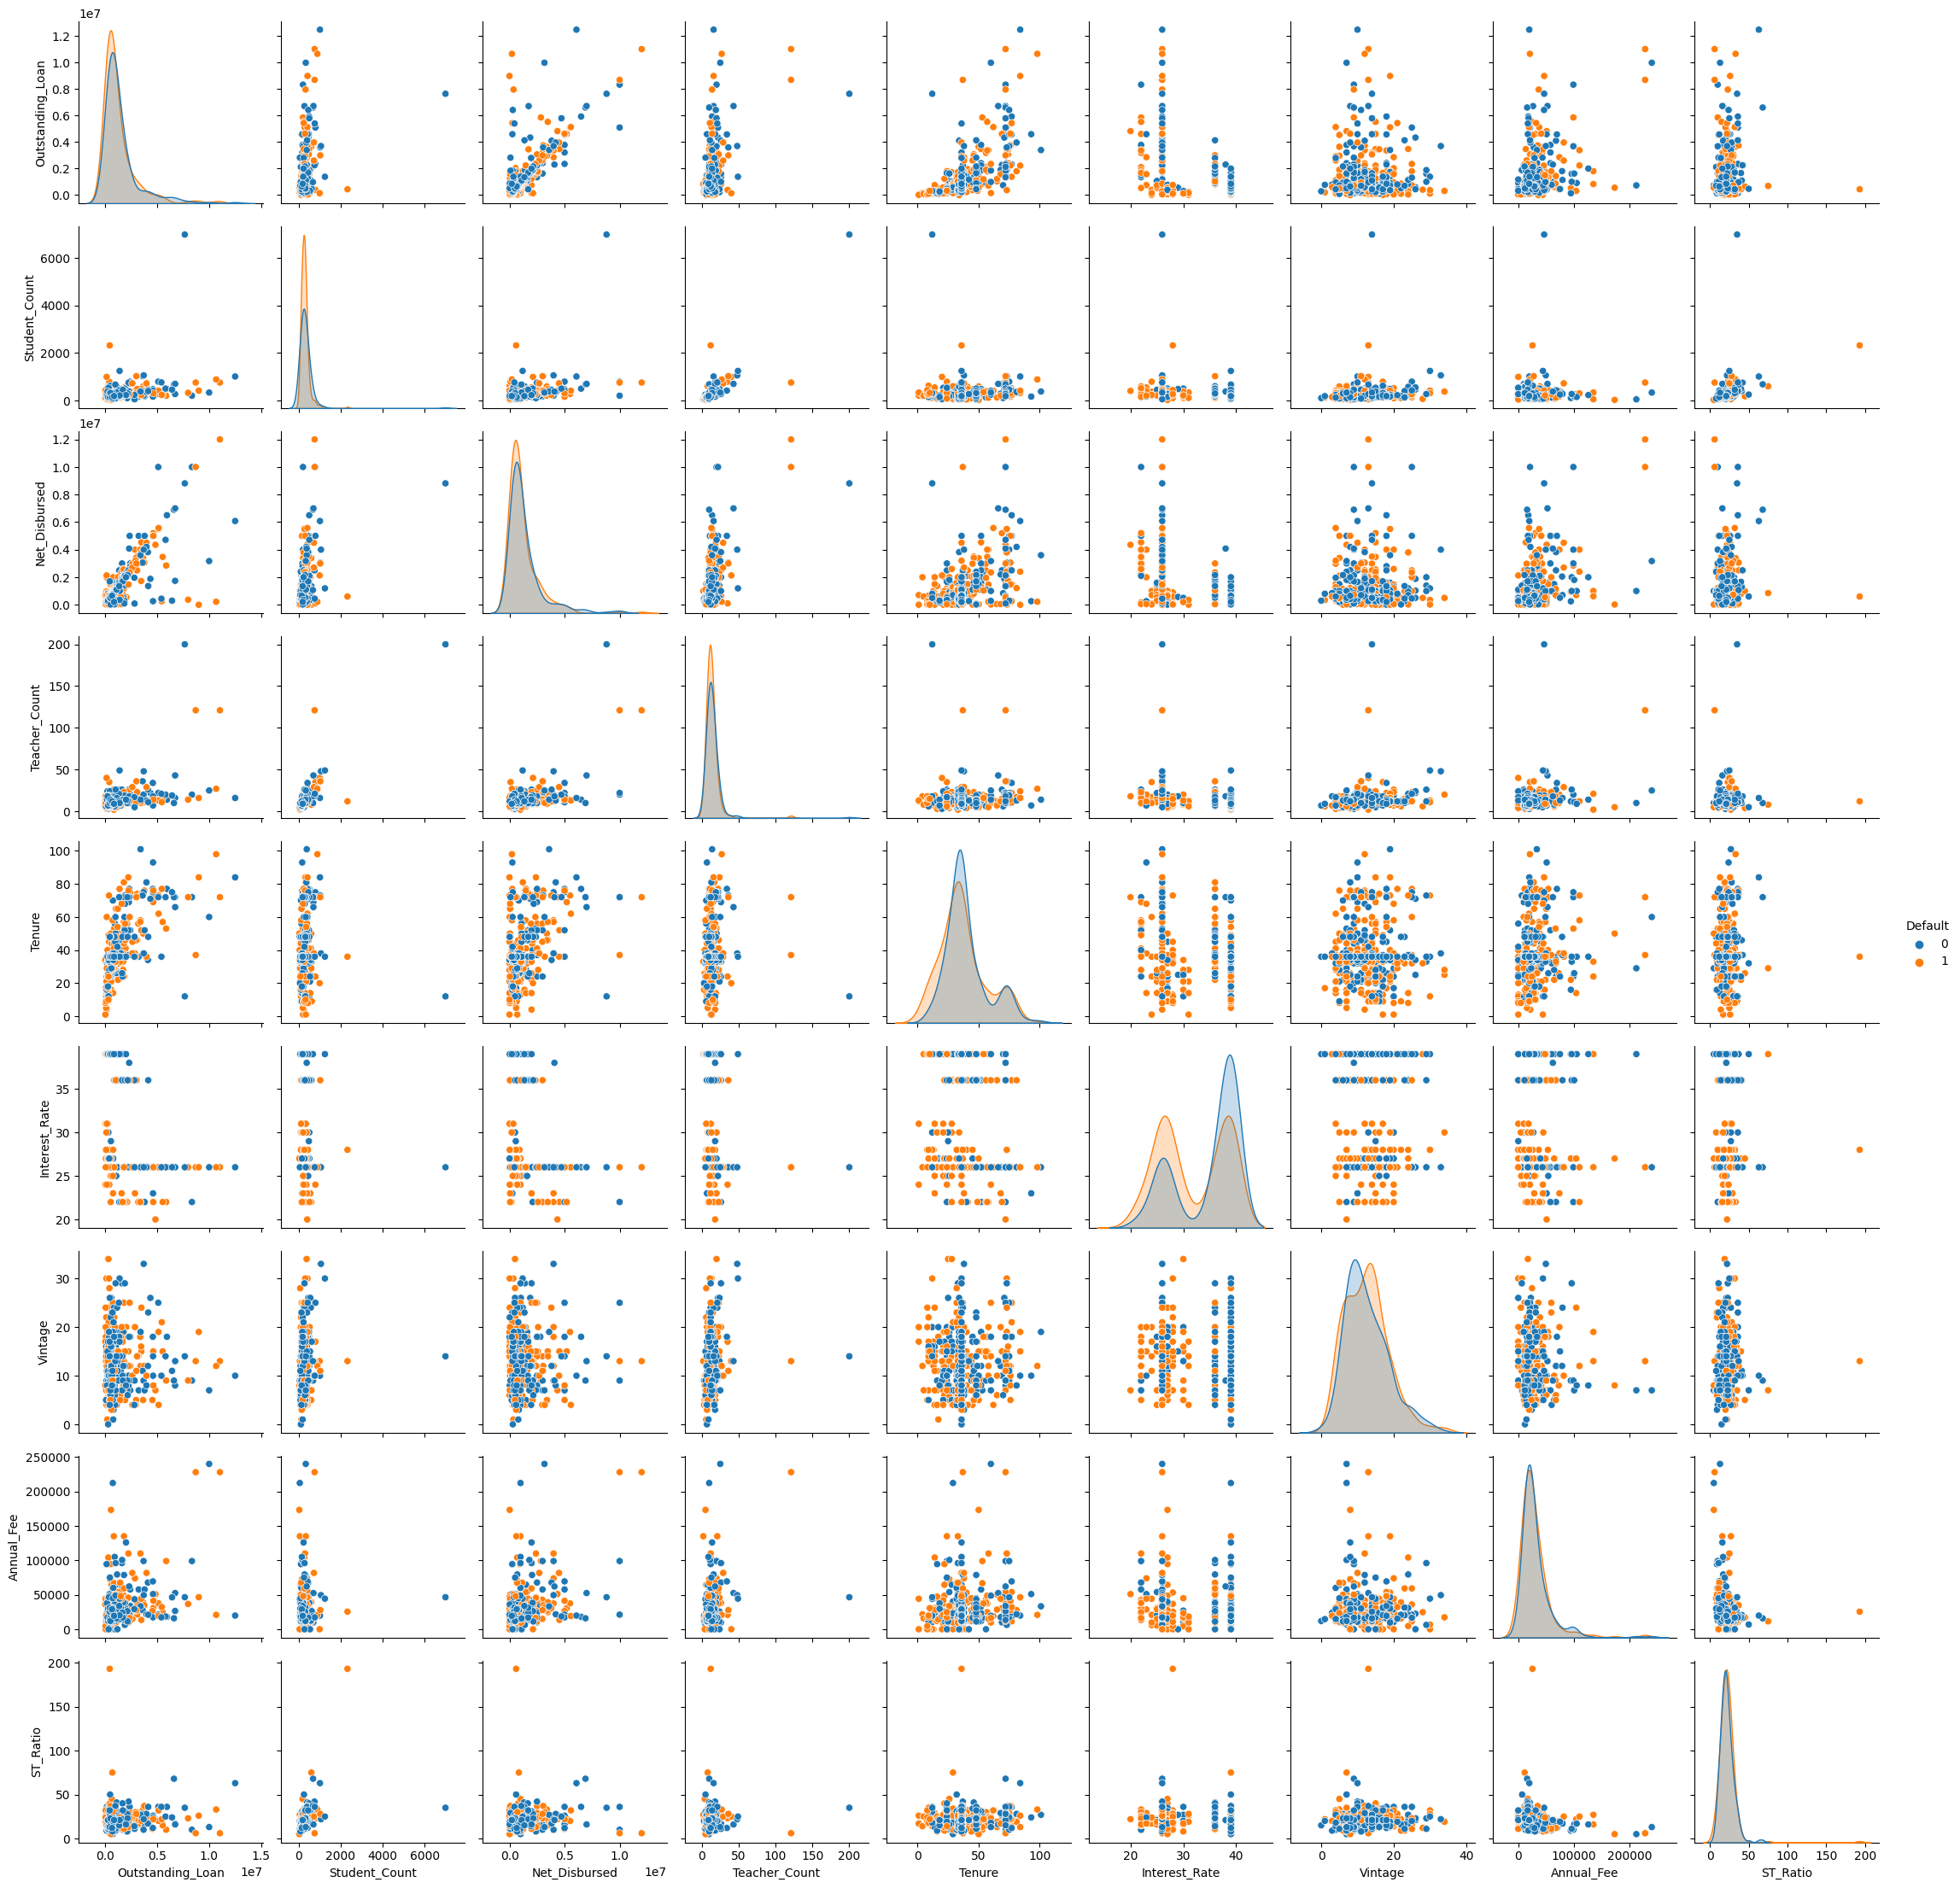

In [8]:
sns.pairplot(features_df, hue='Default')

One hot encoding

In [9]:
# List of categorical columns to one-hot encode
categorical_columns = ['Branch', 'Product_Name', 'Sub_Product','Holiday_Loan', 'End_Use', 'Loan_Classification']

# Perform one-hot encoding on the categorical columns
encoded_df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

encoded_df


,Outstanding_Loan,Student_Count,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio,Annual_Fee,AnnualFee_Income,...,Sub_Product_techy loan,Holiday_Loan_False,Holiday_Loan_True,End_Use_Done,End_Use_Open,End_Use_Pending,Loan_Classification_Consolidated,Loan_Classification_Refinanced,Loan_Classification_Restructured,Loan_Classification_Standard
0,69530,236,12,430000,9,28,14,20,4050,955800,...,False,True,False,False,True,False,False,False,False,True
1,134305,271,12,500000,36,26,13,23,0,0,...,False,True,False,True,False,False,False,False,False,True
2,140746,370,17,1000000,36,24,11,22,6000,2220000,...,False,True,False,True,False,False,False,False,False,True
3,291096,304,15,1000000,13,26,17,20,0,0,...,False,True,False,False,True,False,False,False,False,True
4,108596,416,13,350000,12,28,30,32,0,0,...,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,500000,320,14,500000,36,39,7,23,12000,3840000,...,False,False,True,False,True,False,False,False,False,True
434,650000,145,12,650000,36,39,8,12,28950,4197750,...,False,False,True,True,False,False,False,False,False,True
435,1388000,214,10,354389,36,39,17,21,20250,4333500,...,False,False,True,False,True,False,False,True,False,False
436,10000000,335,25,3174167,60,26,7,13,240000,80400000,...,False,False,True,False,True,False,False,False,False,True


In [10]:
encoded_df.columns

Index(['Outstanding_Loan', 'Student_Count', 'Teacher_Count', 'Net_Disbursed',
       'Tenure', 'Interest_Rate', 'Vintage', 'ST_Ratio', 'Annual_Fee',
       'AnnualFee_Income', 'Default', 'Risk', 'Branch_kisumu branch',
       'Branch_meru branch', 'Branch_nairobi branch', 'Branch_nakuru branch',
       'Branch_nyeri branch', 'Product_Name_bbl micro', 'Product_Name_bridge',
       'Product_Name_flexi', 'Product_Name_platinum',
       'Product_Name_platinum plus', 'Product_Name_super',
       'Sub_Product_school construction', 'Sub_Product_school transport loan',
       'Sub_Product_school upgrade loan', 'Sub_Product_techy loan',
       'Holiday_Loan_False', 'Holiday_Loan_True', 'End_Use_Done',
       'End_Use_Open', 'End_Use_Pending', 'Loan_Classification_Consolidated',
       'Loan_Classification_Refinanced', 'Loan_Classification_Restructured',
       'Loan_Classification_Standard'],
      dtype='object')

In [11]:
encoded_df1=encoded_df.drop('Risk', axis=1)
encoded_df1

,Outstanding_Loan,Student_Count,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio,Annual_Fee,AnnualFee_Income,...,Sub_Product_techy loan,Holiday_Loan_False,Holiday_Loan_True,End_Use_Done,End_Use_Open,End_Use_Pending,Loan_Classification_Consolidated,Loan_Classification_Refinanced,Loan_Classification_Restructured,Loan_Classification_Standard
0,69530,236,12,430000,9,28,14,20,4050,955800,...,False,True,False,False,True,False,False,False,False,True
1,134305,271,12,500000,36,26,13,23,0,0,...,False,True,False,True,False,False,False,False,False,True
2,140746,370,17,1000000,36,24,11,22,6000,2220000,...,False,True,False,True,False,False,False,False,False,True
3,291096,304,15,1000000,13,26,17,20,0,0,...,False,True,False,False,True,False,False,False,False,True
4,108596,416,13,350000,12,28,30,32,0,0,...,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,500000,320,14,500000,36,39,7,23,12000,3840000,...,False,False,True,False,True,False,False,False,False,True
434,650000,145,12,650000,36,39,8,12,28950,4197750,...,False,False,True,True,False,False,False,False,False,True
435,1388000,214,10,354389,36,39,17,21,20250,4333500,...,False,False,True,False,True,False,False,True,False,False
436,10000000,335,25,3174167,60,26,7,13,240000,80400000,...,False,False,True,False,True,False,False,False,False,True


Random classifier feature importances

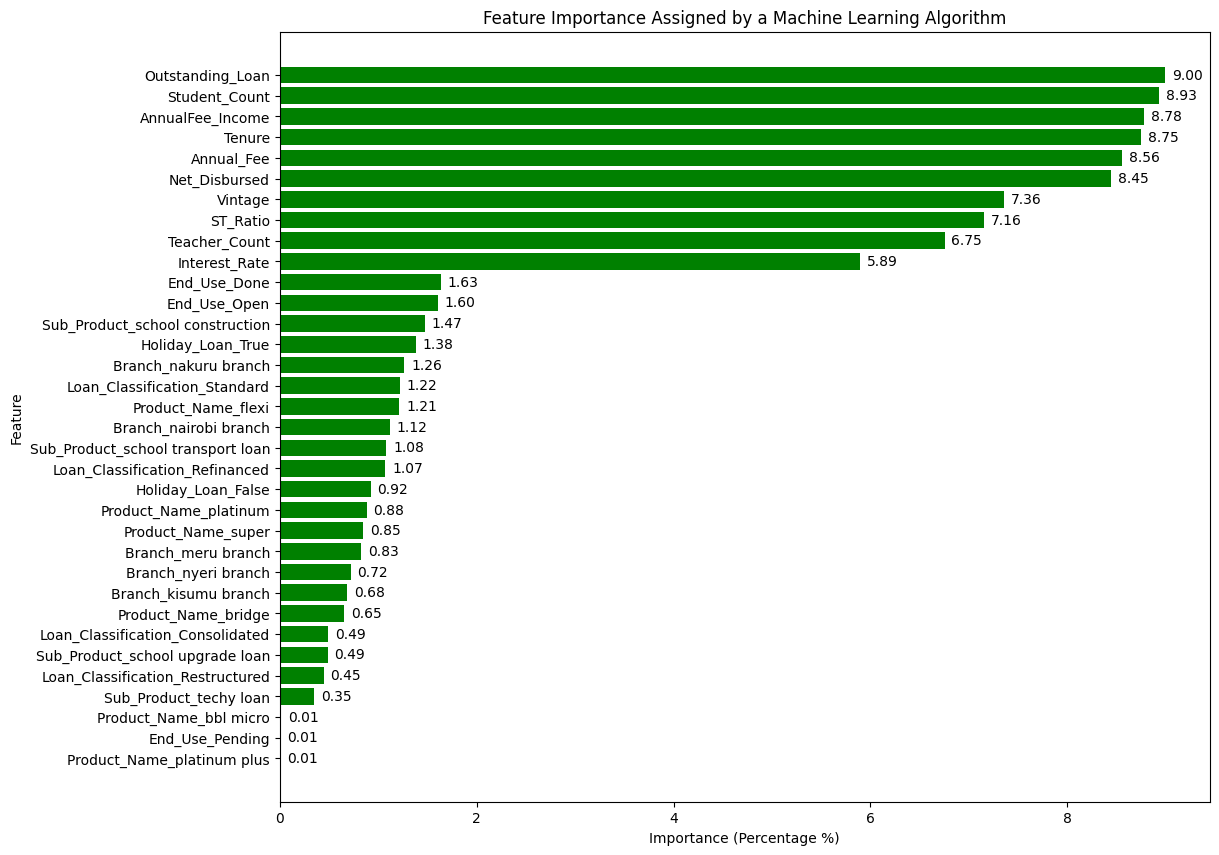

                              Feature  Importance
0                    Outstanding_Loan    0.089963
1                       Student_Count    0.089292
9                    AnnualFee_Income    0.087777
4                              Tenure    0.087521
8                          Annual_Fee    0.085550
3                       Net_Disbursed    0.084462
6                             Vintage    0.073560
7                            ST_Ratio    0.071552
2                       Teacher_Count    0.067517
5                       Interest_Rate    0.058913
27                       End_Use_Done    0.016350
28                       End_Use_Open    0.016026
21    Sub_Product_school construction    0.014737
26                  Holiday_Loan_True    0.013826
13               Branch_nakuru branch    0.012637
33       Loan_Classification_Standard    0.012167
17                 Product_Name_flexi    0.012140
12              Branch_nairobi branch    0.011156
22  Sub_Product_school transport loan    0.010814


In [12]:
#subsetting X and y
X=encoded_df1.drop('Default', axis=1)
y=encoded_df1['Default']
#Creating a randomforestclassifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
#training the model
rf_classifier.fit(X, y)

# Calling feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#visualise
fig, ax=plt.subplots(figsize=(12,10))
importance_percentages = feature_importance_df['Importance']*100
bars=ax.barh(feature_importance_df['Feature'], importance_percentages, color = 'green') 
plt.xlabel('Importance (Percentage %)')
plt.ylabel('Feature')
plt.title('Feature Importance Assigned by a Machine Learning Algorithm')

# Annotate the bars with their importance scores
annotated_bars = []
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(5, 0),
                textcoords='offset points', ha='left', va='center')
    annotated_bars.append(bar)

plt.gca().invert_yaxis()
plt.show()
print(feature_importance_df)

In [13]:
optimal_df=encoded_df[['Student_Count', 'Teacher_Count', 'Net_Disbursed','Tenure', 'Interest_Rate', 'Vintage', 'ST_Ratio', 'Annual_Fee', 'Default']]
optimal_df

,Student_Count,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio,Annual_Fee,Default
0,236,12,430000,9,28,14,20,4050,1
1,271,12,500000,36,26,13,23,0,1
2,370,17,1000000,36,24,11,22,6000,1
3,304,15,1000000,13,26,17,20,0,1
4,416,13,350000,12,28,30,32,0,1
...,...,...,...,...,...,...,...,...,...
433,320,14,500000,36,39,7,23,12000,0
434,145,12,650000,36,39,8,12,28950,0
435,214,10,354389,36,39,17,21,20250,0
436,335,25,3174167,60,26,7,13,240000,0


In [14]:
X1 = optimal_df.drop('Default', axis=1)
y1 = optimal_df['Default']

RANDOM FOREST MACHINE LEARNING ALGORITHM 

In [15]:
# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [16]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_split=15, min_samples_leaf=1, random_state=0)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = rf_classifier.predict(X_train)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance on training data
accuracy_train_rf = accuracy_score(y_train, y_train_pred)

# Evaluate the model's performance on test data
accuracy_test_rf = accuracy_score(y_test, y_test_pred)

# Print the accuracy on both training and test data
print(f"Accuracy on Random Forest Training Data: {accuracy_train_rf*100}")
print(f"Accuracy on Random Forest Test Data: {accuracy_test_rf*100}")

# Calculate cross-validation scores (percentage)
cross_val_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_rf = cross_val_scores_rf.mean()
std_cross_val_score_rf = cross_val_scores_rf.std()

# Print cross-validation scores and statistics
print("K-Nearest Neighbors - Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_rf):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_rf:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_rf:.2f}")



Accuracy on Random Forest Training Data: 90.28571428571428
Accuracy on Random Forest Test Data: 62.5
K-Nearest Neighbors - Cross-Validation Scores (Percentage):
Fold 1: 65.71%
Fold 2: 62.86%
Fold 3: 52.86%
Fold 4: 57.14%
Fold 5: 67.14%
Mean Cross-Validation Score: 61.14%
Standard Deviation of Cross-Validation Scores: 5.38


In [17]:
X1.head()

,Student_Count,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio,Annual_Fee
0,236,12,430000,9,28,14,20,4050
1,271,12,500000,36,26,13,23,0
2,370,17,1000000,36,24,11,22,6000
3,304,15,1000000,13,26,17,20,0
4,416,13,350000,12,28,30,32,0


In [18]:
# Standardised dataset
scaler = StandardScaler()

# Fit and transform the training data
X1_scaled = scaler.fit_transform(X1)

X1_scaled.shape

(438, 8)

In [19]:
# Normalised dataset
#scaler = MinMaxScaler()

# Fit and transform the training data
#X1_norm = scaler.fit_transform(X1)

#X1_norm.shape

In [20]:
#Train Test Split 
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y1, test_size=0.25, random_state=42)

LOGISTIC REGRESSION MACHINE LEARNING ALGORITHM

In [21]:

# Define the 'C' value for regularization
C_value = 1.0  # Adjust this value to control the strength of regularization

# Create a Logistic Regression classifier instance with the specified 'C' value
logistic_regression = LogisticRegression(C=C_value, random_state=0)

# Train the Logistic Regression model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = logistic_regression.predict(X_train)

# Make predictions on the test data
y_test_pred = logistic_regression.predict(X_test)

# Calculate accuracy for training data
accuracy_train_LR = accuracy_score(y_train, y_train_pred) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_LR = accuracy_score(y_test, y_test_pred) * 100  # Convert to percentage

# Print the accuracy on both training and test data as percentages
print(f"Logistic Regression - Accuracy on Training Data: {accuracy_train_LR:.2f}%")
print(f"Logistic Regression - Accuracy on Test Data: {accuracy_test_LR:.2f}%")

# Calculate cross-validation scores (percentage)
cross_val_scores_LR = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_LR = cross_val_scores_LR.mean()
std_cross_val_score_LR = cross_val_scores_LR.std()

# Print cross-validation scores and statistics
print("K-Nearest Neighbors - Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_LR):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_LR:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_LR:.2f}")

Logistic Regression - Accuracy on Training Data: 65.55%
Logistic Regression - Accuracy on Test Data: 60.00%
K-Nearest Neighbors - Cross-Validation Scores (Percentage):
Fold 1: 75.76%
Fold 2: 48.48%
Fold 3: 57.58%
Fold 4: 63.08%
Fold 5: 63.08%
Mean Cross-Validation Score: 61.59%
Standard Deviation of Cross-Validation Scores: 8.87


In [22]:

# Access the coefficients
coefficients = logistic_regression.coef_[0]

# You can pair coefficients with feature names if you have them
feature_names = X1.columns  # Replace with the actual feature names used in your model

# Create a DataFrame to display coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude to assess feature importance
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Now, coefficients_df contains feature coefficients sorted by magnitude
coefficients_df

,Feature,Coefficient
0,Student_Count,-1.189497
4,Interest_Rate,-0.777931
1,Teacher_Count,0.518105
6,ST_Ratio,0.478561
2,Net_Disbursed,-0.282704
3,Tenure,-0.144724
7,Annual_Fee,-0.057057
5,Vintage,-0.053127


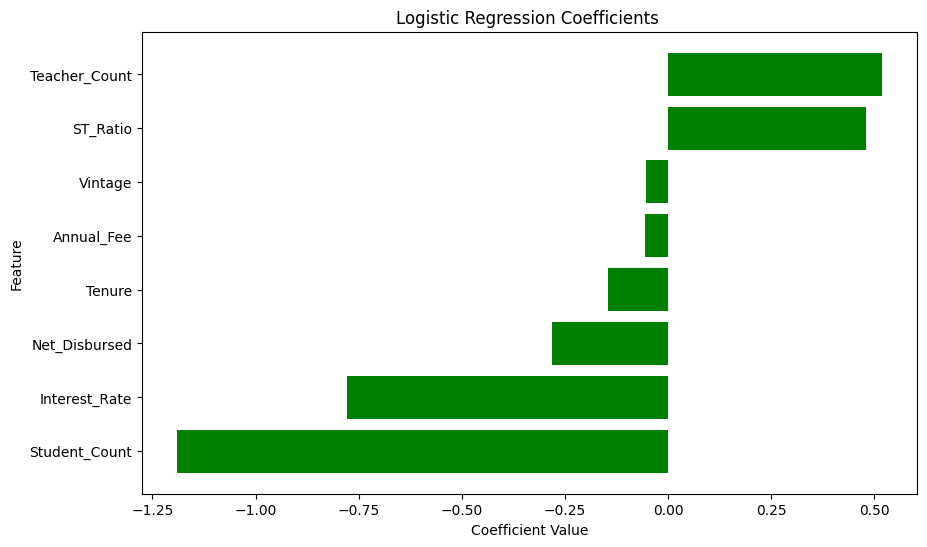

In [23]:
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients ')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest coefficient at the top
plt.show()

K-NEAREST NEIGHBOURS (KNN) MACHINE LEARNING ALGORITHM 

In [24]:
# Define the parameter grid for the grid search to assess best parameters for KNN Model
param_grid = {
    'n_neighbors': [3,5,7,8],
    'p': [1, 2, 3],
}

# Create a KNN classifier instance
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_params

{'n_neighbors': 8, 'p': 1}

In [25]:
#Launching the KNN Model
# Create a KNN classifier instance with the best hyperparameters
best_n_neighbors = best_params['n_neighbors']
best_p = best_params['p']
knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, p=best_p)

# Train the KNN model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_knn = knn_classifier.predict(X_train)

# Make predictions on the test data
y_test_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy for training data
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn) * 100  # Convert to percentage

# Print the accuracy on both training and test data as percentages
print(f"K-Nearest Neighbors - Accuracy on Training Data: {accuracy_train_knn:.2f}%")
print(f"K-Nearest Neighbors - Accuracy on Test Data: {accuracy_test_knn:.2f}%")

# Calculate cross-validation scores (percentage)
cross_val_scores_knn = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_knn = cross_val_scores_knn.mean()
std_cross_val_score_knn = cross_val_scores_knn.std()

# Print cross-validation scores and statistics
print("K-Nearest Neighbors - Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_knn):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_knn:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_knn:.2f}")

K-Nearest Neighbors - Accuracy on Training Data: 67.99%
K-Nearest Neighbors - Accuracy on Test Data: 64.55%
K-Nearest Neighbors - Cross-Validation Scores (Percentage):
Fold 1: 71.21%
Fold 2: 60.61%
Fold 3: 60.61%
Fold 4: 61.54%
Fold 5: 63.08%
Mean Cross-Validation Score: 63.41%
Standard Deviation of Cross-Validation Scores: 4.01


XGBOOST (EXTREME GRADIENT BOOSTING) MACHINE LEARNING ALGORITHM

In [26]:
# Define the hyperparameters and their ranges for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Create an XGBoost classifier instance
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Create a new XGBoost classifier with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(**best_params, random_state=0)

# Train the optimized XGBoost model on the training data
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_xgb = best_xgb_classifier.predict(X_train)

# Make predictions on the test data
y_test_pred_xgb = best_xgb_classifier.predict(X_test)

# Calculate accuracy for training data
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb) * 100  # Convert to percentage

print(f"XGBoost - Accuracy on Training Data: {accuracy_train_xgb:.2f}%")
print(f"XGBoost - Accuracy on Test Data: {accuracy_test_xgb:.2f}%")

# Calculate cross-validation scores (percentage)
cross_val_scores_xgb = cross_val_score(best_xgb_classifier, X_train, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_xgb = cross_val_scores_xgb.mean()
std_cross_val_score_xgb = cross_val_scores_xgb.std()

# Print cross-validation scores and statistics
print("XGBoost - Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_xgb):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_xgb:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_xgb:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
XGBoost - Accuracy on Training Data: 81.71%
XGBoost - Accuracy on Test Data: 66.36%


c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users\john.g\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users

XGBoost - Cross-Validation Scores (Percentage):
Fold 1: 74.24%
Fold 2: 62.12%
Fold 3: 62.12%
Fold 4: 60.00%
Fold 5: 64.62%
Mean Cross-Validation Score: 64.62%
Standard Deviation of Cross-Validation Scores: 5.03


SUPPORT VECTOR MACHINE (SVM) MACHINE LEARNING ALGORITHM

In [27]:
# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.1, 1, 10]         # Kernel coefficient
}

# Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to create a tuned SVM model
tuned_svm_classifier = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
tuned_svm_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = tuned_svm_classifier.predict(X_train)

# Make predictions on the test data
y_test_pred = tuned_svm_classifier.predict(X_test)

# Calculate accuracy for training data
accuracy_train_svm = accuracy_score(y_train, y_train_pred) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_svm = accuracy_score(y_test, y_test_pred) * 100  # Convert to percentage

# Calculate cross-validation scores (percentage)
cross_val_scores_svm = cross_val_score(tuned_svm_classifier, X_train, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_svm = cross_val_scores_svm.mean()
std_cross_val_score_svm = cross_val_scores_svm.std()

# Print the accuracy on both training and test data as percentages
print(f"SVM - Accuracy on Training Data: {accuracy_train_svm:.2f}%")
print(f"SVM - Accuracy on Test Data: {accuracy_test_svm:.2f}%")

# Print cross-validation scores and statistics
print("Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_svm):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_svm:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_svm:.2f}")

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
SVM - Accuracy on Training Data: 64.63%
SVM - Accuracy on Test Data: 58.18%
Cross-Validation Scores (Percentage):
Fold 1: 71.21%
Fold 2: 59.09%
Fold 3: 56.06%
Fold 4: 69.23%
Fold 5: 64.62%
Mean Cross-Validation Score: 64.04%
Standard Deviation of Cross-Validation Scores: 5.78


In [28]:
# Define the model names
model_names = ["Random Forest Algorithm", "Logistic Regression Algorithm", "K-Nearest Neighbors Algorithm", "XGBoost Algorithm", "SVM Algorithm"]

# Define the corresponding training, test accuracies, mean, and std for each model
training_accuracies = [accuracy_train_rf*100, accuracy_train_LR, accuracy_train_knn, accuracy_train_xgb, accuracy_train_svm]
test_accuracies = [accuracy_test_rf*100, accuracy_test_LR, accuracy_test_knn, accuracy_test_xgb, accuracy_test_svm]
mean_cross_val_scores = [mean_cross_val_score_rf, mean_cross_val_score_LR, mean_cross_val_score_knn, mean_cross_val_score_xgb, mean_cross_val_score_svm]
std_cross_val_scores = [std_cross_val_score_rf, std_cross_val_score_LR, std_cross_val_score_knn, std_cross_val_score_xgb, std_cross_val_score_svm]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': training_accuracies,
    'Test Accuracy': test_accuracies,
    'Mean Cross-Validation Score': mean_cross_val_scores,
    'Std Deviation of Cross-Validation Scores': std_cross_val_scores
})

# Display the results DataFrame
print(results_df)

                           Model  Training Accuracy  Test Accuracy  \
0        Random Forest Algorithm          90.285714      62.500000   
1  Logistic Regression Algorithm          65.548780      60.000000   
2  K-Nearest Neighbors Algorithm          67.987805      64.545455   
3              XGBoost Algorithm          81.707317      66.363636   
4                  SVM Algorithm          64.634146      58.181818   

   Mean Cross-Validation Score  Std Deviation of Cross-Validation Scores  
0                    61.142857                                  5.375682  
1                    61.594406                                  8.865677  
2                    63.407925                                  4.005267  
3                    64.620047                                  5.028386  
4                    64.041958                                  5.777174  


CHI SQUARE ANALYSIS

In [29]:
categorical_df=df[['Branch', 'Product_Name', 'Sub_Product','Holiday_Loan', 'End_Use', 'Loan_Classification','Default']]
categorical_df

,Branch,Product_Name,Sub_Product,Holiday_Loan,End_Use,Loan_Classification,Default
0,nairobi branch,bridge,school upgrade loan,False,Open,Standard,1
1,nairobi branch,bridge,school construction,False,Done,Standard,1
2,nairobi branch,flexi,school construction,False,Done,Standard,1
3,nairobi branch,flexi,school construction,False,Open,Standard,1
4,nairobi branch,bridge,school construction,False,Done,Standard,1
...,...,...,...,...,...,...,...
433,kisumu branch,bridge,school upgrade loan,True,Open,Standard,0
434,kisumu branch,flexi,school transport loan,True,Done,Standard,0
435,nairobi branch,flexi,school transport loan,True,Open,Refinanced,0
436,nairobi branch,platinum,school construction,True,Open,Standard,0


In [30]:
for column in categorical_df.columns[:-1]:  
    contingency_table = pd.crosstab(categorical_df[column], categorical_df['Default'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-Square Test for '{column}' vs. 'Default':")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")
    
    alpha = 0.05  # Set your significance level
    if p < alpha:
        print(f"Result: Reject null hypothesis. '{column}' is associated with 'Default'.\n")
    else:
        print(f"Result: Fail to reject null hypothesis. '{column}' is not associated with 'Default'.\n")

Chi-Square Test for 'Branch' vs. 'Default':
Chi-Square Statistic: 3.40195468741853
P-value: 0.4929420502175713
Result: Fail to reject null hypothesis. 'Branch' is not associated with 'Default'.

Chi-Square Test for 'Product_Name' vs. 'Default':
Chi-Square Statistic: 9.08945852032318
P-value: 0.10554872038182847
Result: Fail to reject null hypothesis. 'Product_Name' is not associated with 'Default'.

Chi-Square Test for 'Sub_Product' vs. 'Default':
Chi-Square Statistic: 9.362665865883486
P-value: 0.024838152899725126
Result: Reject null hypothesis. 'Sub_Product' is associated with 'Default'.

Chi-Square Test for 'Holiday_Loan' vs. 'Default':
Chi-Square Statistic: 18.690580895337618
P-value: 1.537400581236805e-05
Result: Reject null hypothesis. 'Holiday_Loan' is associated with 'Default'.

Chi-Square Test for 'End_Use' vs. 'Default':
Chi-Square Statistic: 3.747157566901566
P-value: 0.15357307241262233
Result: Fail to reject null hypothesis. 'End_Use' is not associated with 'Default'.

Ch

In [31]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [32]:
# Function to predict credit default
def predict_credit_default():
    try:
        Student_Count = float(Student_Count_entry.get())
        Teacher_Count = float(Teacher_Count_entry.get())
        Net_Disbursed = float(Net_Disbursed_entry.get())
        Tenure = float(Tenure_entry.get())
        Interest_Rate = float(Interest_Rate_entry.get())
        Vintage = float(Vintage_entry.get())
        ST_Ratio = float(ST_Ratio_entry.get())
        Annual_Fee = float(Annual_Fee_entry.get())
        # Make a prediction using the trained model
        prediction = model.predict([[
            Student_Count, Annual_Fee, Tenure, 
            Net_Disbursed, Vintage, ST_Ratio, Teacher_Count, Interest_Rate
        ]])
        
        if prediction[0] == 0:
            result_label.config(text="Prediction: Non-Default")
        else:
            result_label.config(text="Prediction: Default")
    
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values.")


In [33]:
#Load Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Create the main window
window = tk.Tk()
window.title("Credit Scoring Model")

# Create input fields and labels for the specified columns

Student_Count_label = tk.Label(window, text="Student Count:")
Student_Count_entry = tk.Entry(window)

Tenure_label = tk.Label(window, text="Tenure:")
Tenure_entry = tk.Entry(window)

Annual_Fee_label = tk.Label(window, text="Annual Fee:")
Annual_Fee_entry = tk.Entry(window)

Net_Disbursed_label = tk.Label(window, text="Net Disbursed:")
Net_Disbursed_entry = tk.Entry(window)

Vintage_label = tk.Label(window, text="Vintage:")
Vintage_entry = tk.Entry(window)

ST_Ratio_label = tk.Label(window, text="Student-Teacher Ratio:")
ST_Ratio_entry = tk.Entry(window)

Teacher_Count_label = tk.Label(window, text="Teacher Count:")
Teacher_Count_entry = tk.Entry(window)

Interest_Rate_label = tk.Label(window, text="Interest Rate:")
Interest_Rate_entry = tk.Entry(window)

# Create a button to predict
predict_button = tk.Button(window, text="Predict", command=predict_credit_default)

# Create a label to display the prediction result
result_label = tk.Label(window, text="Prediction:")


In [35]:
# Place widgets on the window

Student_Count_label.pack()
Student_Count_entry.pack()

Tenure_label.pack()
Tenure_entry.pack()

Annual_Fee_label.pack()
Annual_Fee_entry.pack()

Net_Disbursed_label.pack()
Net_Disbursed_entry.pack()

Vintage_label.pack()
Vintage_entry.pack()

ST_Ratio_label.pack()
ST_Ratio_entry.pack()

Teacher_Count_label.pack()
Teacher_Count_entry.pack()

Interest_Rate_label.pack()
Interest_Rate_entry.pack()

predict_button.pack()
result_label.pack()

# Start the GUI main loop
window.mainloop()